Data Loading

In [ ]:
!curl -L -o smartphones.zip https://www.kaggle.com/api/v1/datasets/download/nishantdeswal1810/smartphones

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 37356  100 37356    0     0  55626      0 --:--:-- --:--:-- --:--:-- 55626


In [ ]:
!unzip -qq smartphones.zip

Data Pre-processing and EDA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('smartphones - smartphones.csv')

In [ ]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [ ]:
df.isnull().sum()

,0
model,0
price,0
rating,141
sim,0
processor,0
ram,0
battery,0
display,0
camera,1
card,7


In [ ]:
df['price'] = df['price'].str.replace('₹', '').str.replace(',', '').astype(int)

In [ ]:
for col in ['ram', 'battery', 'display', 'camera', 'processor', 'os', 'card', 'sim']:
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)

In [ ]:
# extract RAM in GB
df['ram_gb'] = pd.to_numeric(df['ram'].str.extract(r'(\d+)')[0], errors='coerce').fillna(0).astype(int)

# extract Storage in GB
df['storage_gb'] = pd.to_numeric(df['ram'].str.extract(r'(\d+)\s*GB inbuilt')[0], errors='coerce').fillna(0).astype(int)

# extract Battery capacity
df['battery_mah'] = pd.to_numeric(df['battery'].str.extract(r'(\d+)')[0], errors='coerce').fillna(0).astype(int)


In [ ]:
# Size
df['display_size'] = df['display'].str.extract(r'(\d+\.?\d*)\s*inches').astype(float)

# Refresh Rate
df['refresh_rate'] = df['display'].str.extract(r'(\d+)\s*Hz').astype(float)

In [ ]:
df['rear_camera_mp'] = pd.to_numeric(df['camera'].str.extract(r'(\d+)\s*MP')[0], errors='coerce').fillna(0).astype(int)

In [ ]:
df['processor_brand'] = df['processor'].str.extract(r'([A-Za-z]+)')
df['clock_speed'] = df['processor'].str.extract(r'(\d+\.?\d*)\s*GHz').astype(float)

In [ ]:
df['supports_5g'] = df['sim'].str.contains('5G').astype(int)
df['supports_nfc'] = df['sim'].str.contains('NFC').astype(int)

In [ ]:
df['android_version'] = pd.to_numeric(df['os'].str.extract(r'Android v(\d+)')[0], errors='coerce').fillna(0).astype(int)

In [ ]:
df['memory_card_supported'] = (
    ~df['card'].fillna('').str.contains('Not Supported', case=False)
).astype(int)


In [ ]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,...,battery_mah,display_size,refresh_rate,rear_camera_mp,processor_brand,clock_speed,supports_5g,supports_nfc,android_version,memory_card_supported
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,...,5000,6.70,120.0,50,Snapdragon,3.2,1,1,13,0
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",...,5000,6.59,120.0,64,Snapdragon,2.2,1,0,12,1
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",...,5000,6.60,90.0,50,Exynos,2.4,1,0,13,1
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",...,5000,6.55,120.0,50,Snapdragon,2.2,1,0,12,1
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,...,5000,6.70,120.0,108,Dimensity,2.6,1,0,13,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model                  1020 non-null   object 
 1   price                  1020 non-null   int64  
 2   rating                 879 non-null    float64
 3   sim                    1020 non-null   object 
 4   processor              1020 non-null   object 
 5   ram                    1020 non-null   object 
 6   battery                1020 non-null   object 
 7   display                1020 non-null   object 
 8   camera                 1019 non-null   object 
 9   card                   1013 non-null   object 
 10  os                     1003 non-null   object 
 11  ram_gb                 1020 non-null   int64  
 12  storage_gb             1020 non-null   int64  
 13  battery_mah            1020 non-null   int64  
 14  display_size           987 non-null    float64
 15  refr

In [ ]:
df['rating'].fillna(df['rating'].median(), inplace=True)
df['display_size'].fillna(df['display_size'].median(), inplace=True)
df['refresh_rate'].fillna(df['refresh_rate'].median(), inplace=True)
df['clock_speed'].fillna(df['clock_speed'].median(), inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

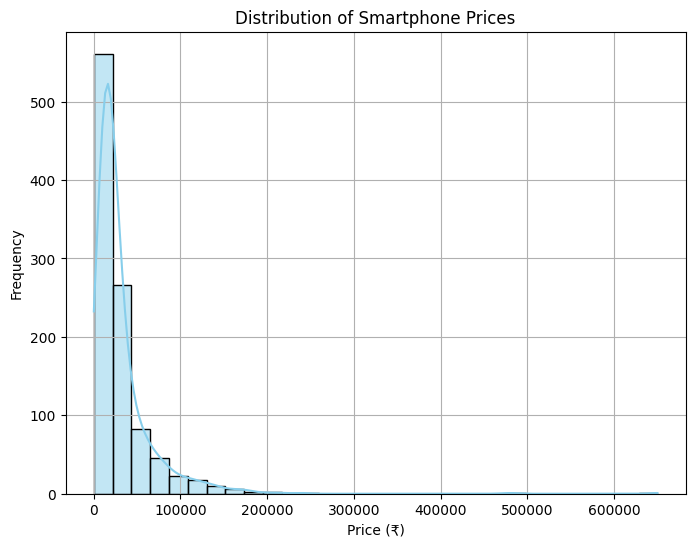

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Smartphone Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

<ipython-input-38-9dab3f687485>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='storage_gb', y='price', data=df, estimator=np.mean, palette='Greens_d')


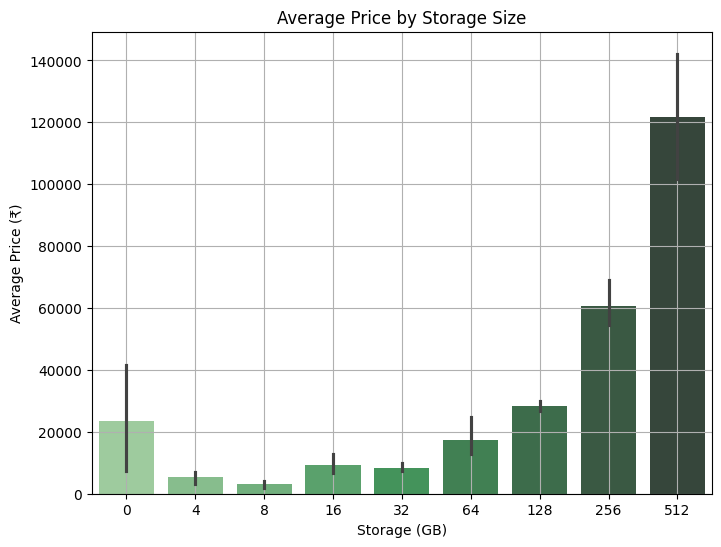

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='storage_gb', y='price', data=df, estimator=np.mean, palette='Greens_d')
plt.title("Average Price by Storage Size")
plt.xlabel("Storage (GB)")
plt.ylabel("Average Price (₹)")
plt.grid(True)
plt.show()

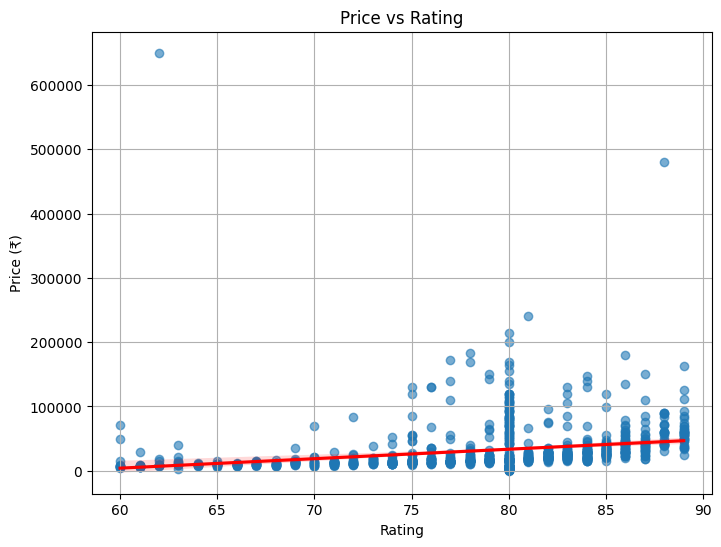

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='rating', y='price', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Price vs Rating")
plt.xlabel("Rating")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.show()

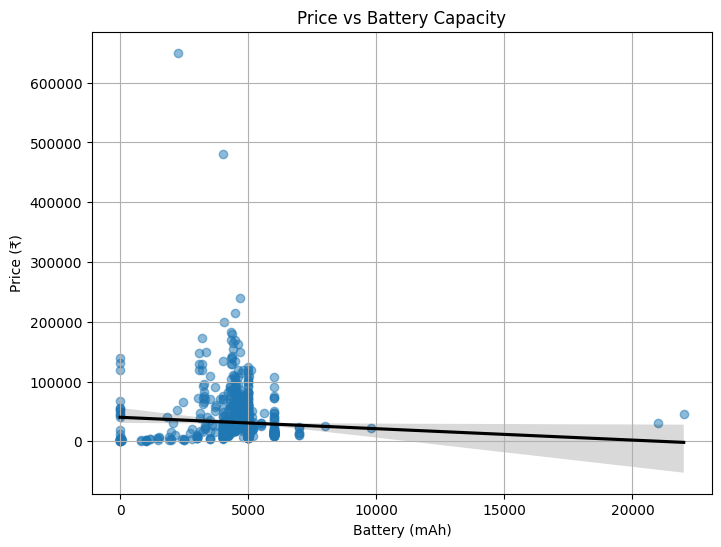

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='battery_mah', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.title("Price vs Battery Capacity")
plt.xlabel("Battery (mAh)")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.show()

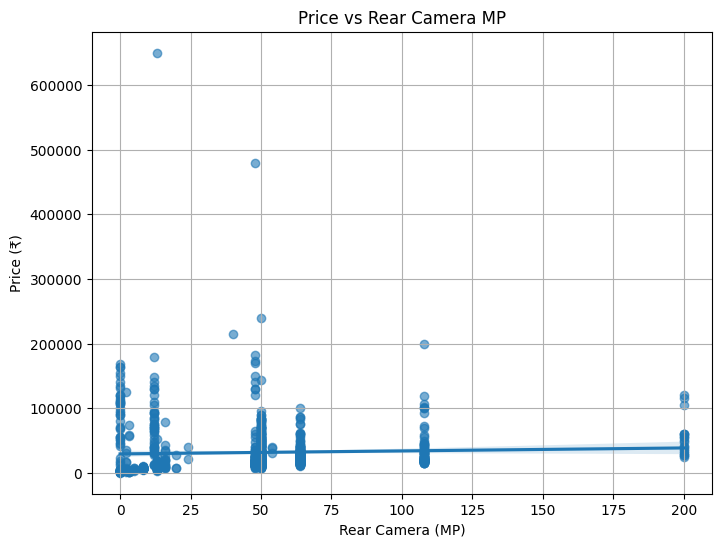

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='rear_camera_mp', y='price', data=df, scatter_kws={'alpha':0.6})
plt.title("Price vs Rear Camera MP")
plt.xlabel("Rear Camera (MP)")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.show()

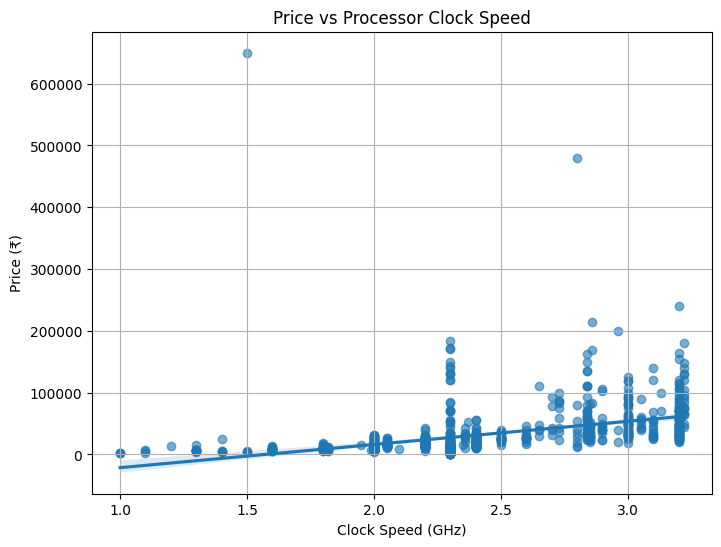

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='clock_speed', y='price', data=df, scatter_kws={'alpha':0.6})
plt.title("Price vs Processor Clock Speed")
plt.xlabel("Clock Speed (GHz)")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.show()

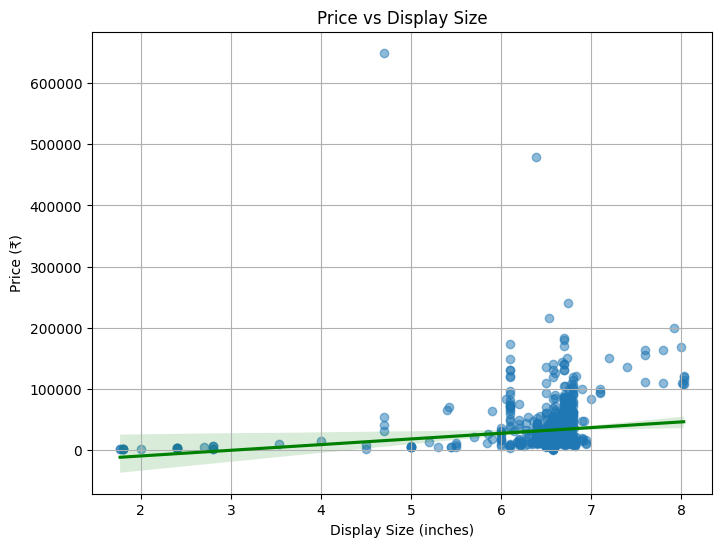

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='display_size', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.title("Price vs Display Size")
plt.xlabel("Display Size (inches)")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.show()

<ipython-input-44-3203cfc4f572>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='processor_brand', y='price', data=df, estimator=np.mean, palette='coolwarm')


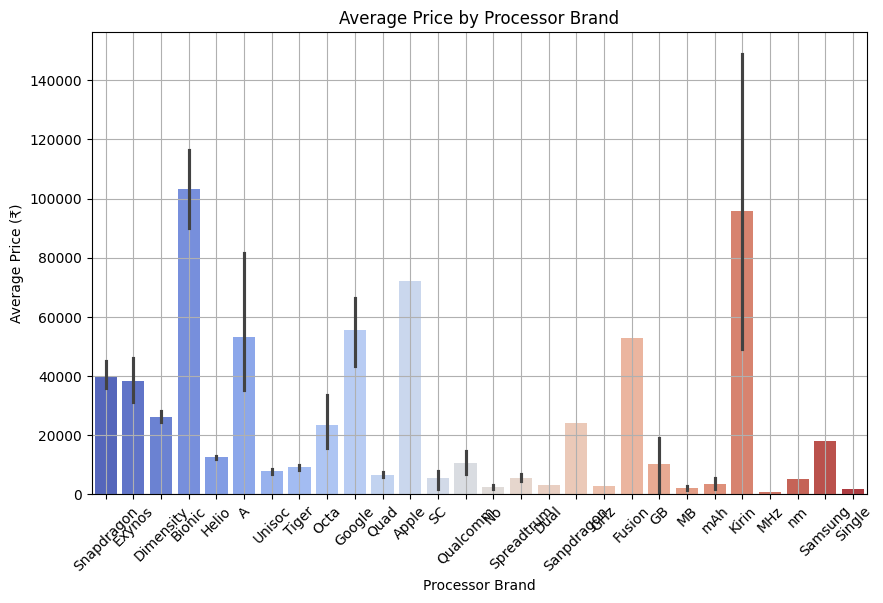

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='processor_brand', y='price', data=df, estimator=np.mean, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Average Price by Processor Brand")
plt.xlabel("Processor Brand")
plt.ylabel("Average Price (₹)")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode processor_brand
le = LabelEncoder()
df['processor_brand_encoded'] = le.fit_transform(df['processor_brand'])

feature_columns = [
    'rating', 'ram_gb', 'storage_gb', 'battery_mah', 'display_size',
    'refresh_rate', 'rear_camera_mp', 'clock_speed',
    'supports_5g', 'supports_nfc', 'android_version', 'memory_card_supported',
    'processor_brand_encoded'
]

X = df[feature_columns]
y = df['price']

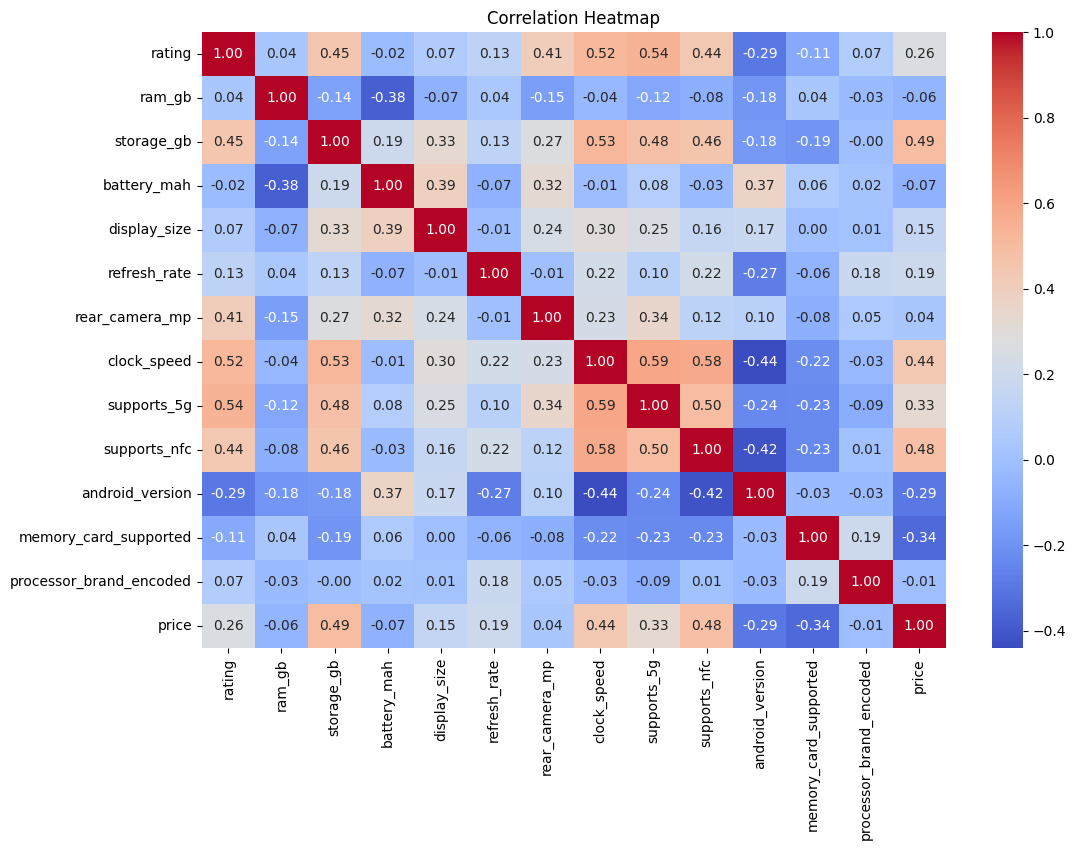

In [ ]:
plt.figure(figsize=(12, 8))
corr = df[feature_columns + ['price']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 15478.68
RMSE: 25430.79
R² Score: 0.4909


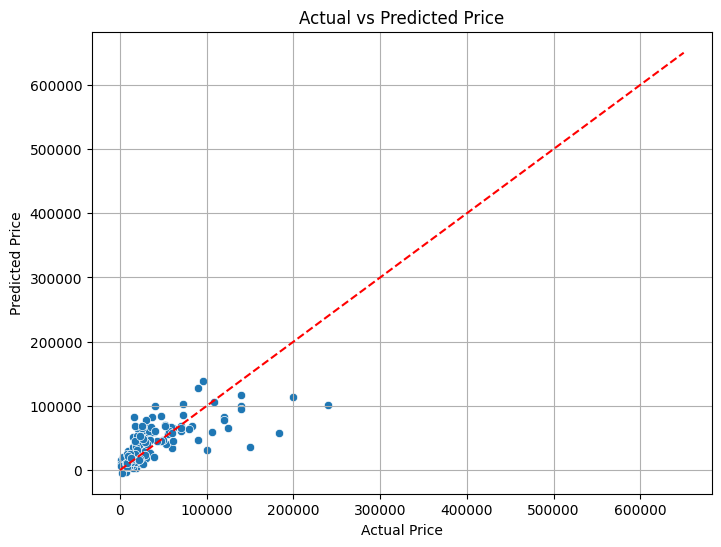

In [ ]:
# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()

<ipython-input-65-53426bfc390c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=coef_df, palette='viridis')


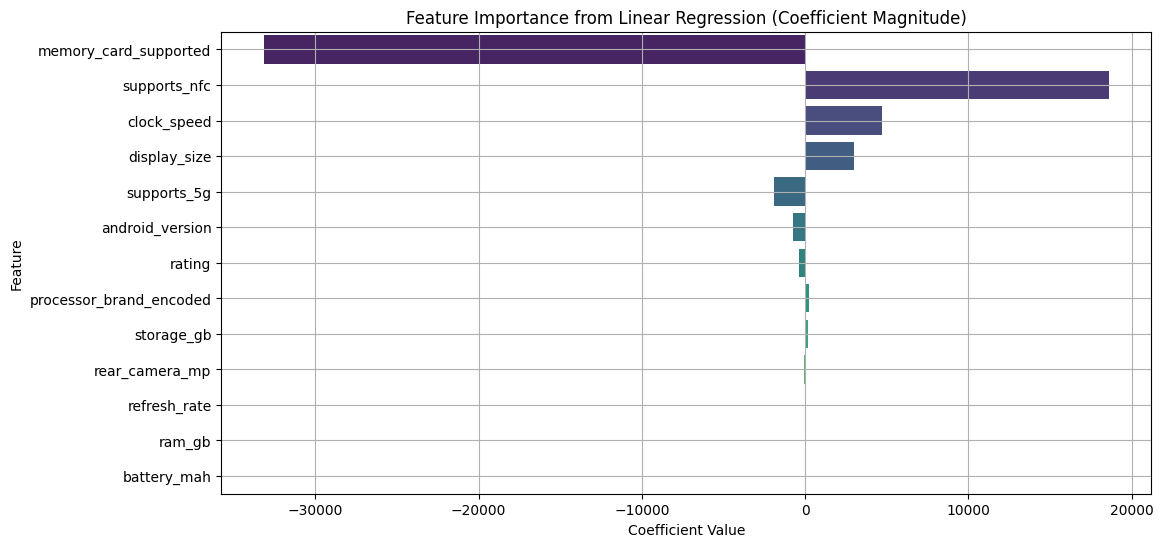

In [ ]:
coefs = lr.coef_
feature_names = X_train.columns

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefs
}).sort_values(by='coefficient', key=np.abs, ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='coefficient', y='feature', data=coef_df, palette='viridis')
plt.title('Feature Importance from Linear Regression (Coefficient Magnitude)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")

Random Forest MAE: 7809.38
Random Forest RMSE: 19685.77
Random Forest R² Score: 0.6950


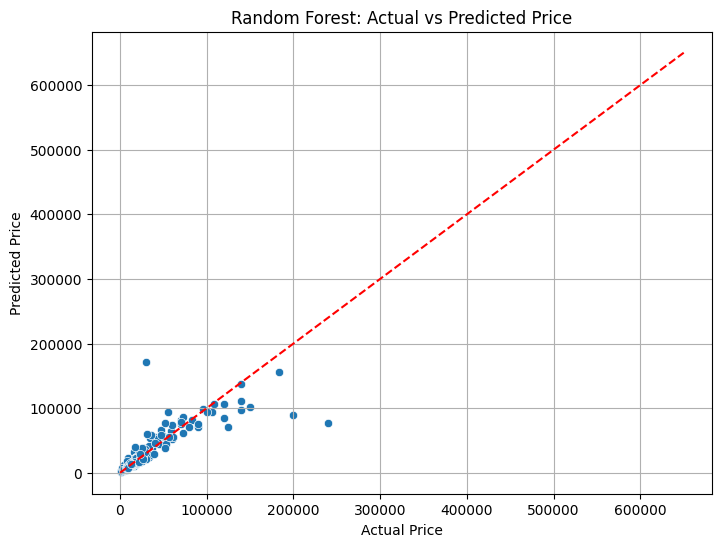

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Price")
plt.grid(True)
plt.show()

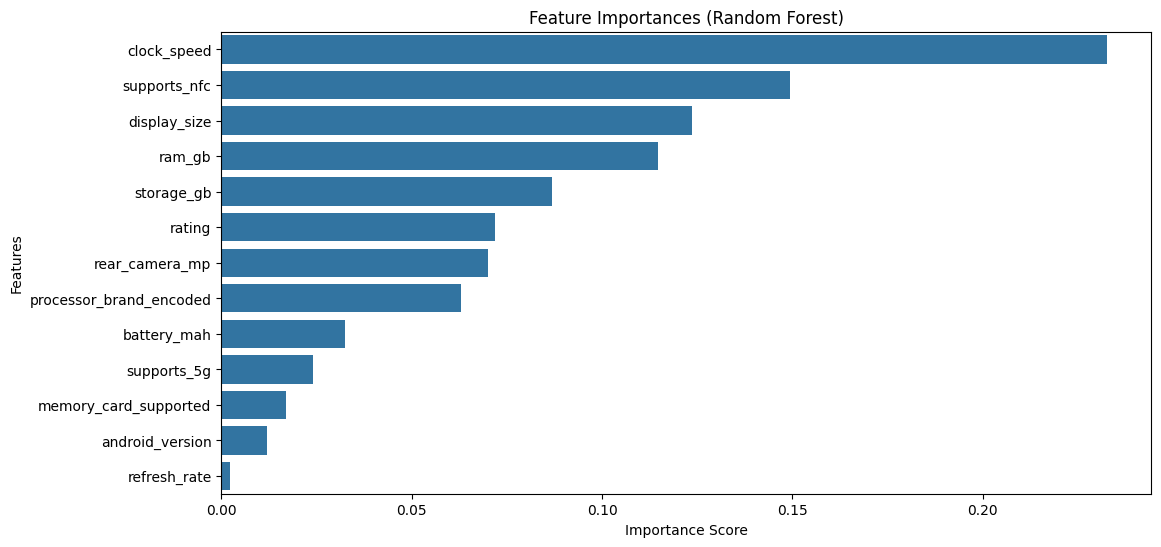

In [ ]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=feature_columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()